In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [4]:
iris=load_iris()

In [5]:
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)

<ipython-input-5-f13a617fdde0>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris.target==0).astype(np.int)


In [6]:
X,y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [7]:
per_clf=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
per_clf.fit(X,y)
y_pred=per_clf.predict([[2,0.5]])

In [8]:
y_pred

array([1])

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(loss='perceptron',learning_rate='constant',eta0=1,penalty=None)

In [10]:
sgd_clf.fit(X,y)
y_pred=sgd_clf.predict([[2,0.5]])

In [11]:
y_pred

array([0])

In [12]:
per_clf.coef_

array([[-1.4, -2.2]])

In [13]:
per_clf.intercept_

array([4.])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

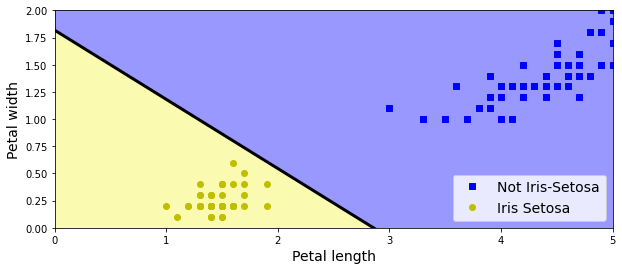

In [14]:
a=-per_clf.coef_[0][0]/per_clf.coef_[0][1]
b=-per_clf.intercept_/per_clf.coef_[0][1]

axes=[0,5,0,2]

x0,x1=np.meshgrid(
      np.linspace(axes[0],axes[1],500).reshape(-1,1),
      np.linspace(axes[2],axes[3],500).reshape(-1,1)
)
X_new=np.c_[x0.ravel(),x1.ravel()]
y_predict=per_clf.predict(X_new)
zz=y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs',label='Not Iris-Setosa')
plt.plot(X[y==1,0],X[y==1,1],'yo',label='Iris Setosa')
plt.plot([axes[0],axes[1]],[ b + a * axes[0], b + a * axes[1]],'k-',linewidth=3)
plt.axis(axes)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

In [15]:
axes[0],axes[1]

(0, 5)

## Activation Functions

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)
def derivative(f,z,eps=0.000001):
    return (f(z+eps)-f(z-eps))/(2*eps)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-5.0, 5.0, -0.2, 1.2)

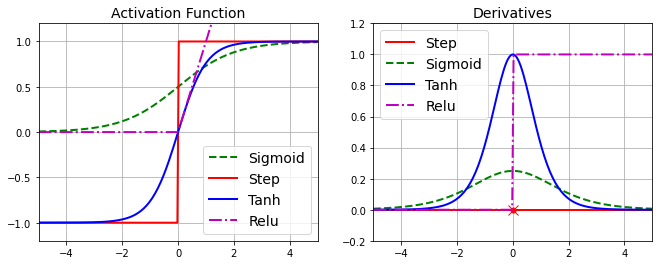

In [17]:
z= np.linspace(-5,5,200)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(z,sigmoid(z),'g--',linewidth=2,label='Sigmoid')
plt.plot(z,np.sign(z),'r-',linewidth=2,label='Step')
plt.plot(z,np.tanh(z),'b-',linewidth=2,label='Tanh')
plt.plot(z,relu(z),'m-.',linewidth=2,label='Relu')
plt.axis([-5, 5, -1.2, 1.2])
plt.legend(loc='best',fontsize=14)
plt.grid('on')
plt.title('Activation Function',fontsize=14)

plt.subplot(122)
plt.plot(z,derivative(np.sign,z),'r-',linewidth=2,label='Step')
plt.plot(0,0,'ro',markersize=5)
plt.plot(0,0,'rx',markersize=10)
plt.plot(z,derivative(sigmoid,z),'g--',linewidth=2,label='Sigmoid')
plt.plot(z,derivative(np.tanh,z),'b-',linewidth=2,label='Tanh')
plt.plot(z,derivative(relu,z),'m-.',linewidth=2,label='Relu')
plt.grid(True)
plt.legend(loc="best", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

In [18]:
def heaviside(z):
    return (z>=0).astype('int')
def xor(x1,x2,activation=heaviside):
    return activation(-activation(x1+x2-1.5)+activation(x1+x2-0.5)-0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Activation function: step')

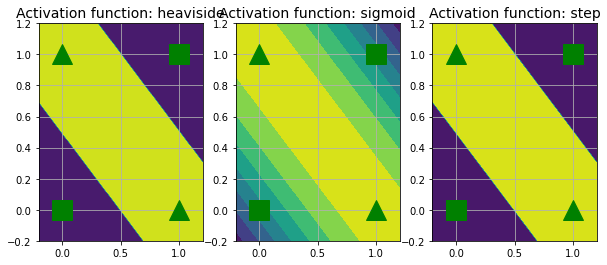

In [19]:
x1s=np.linspace(-0.2,1.2,100)
x2s=np.linspace(-0.2,1.2,100)

x1,x2=np.meshgrid(x1s,x2s)

z1=xor(x1,x2,activation=heaviside)
z2=xor(x1,x2,activation=sigmoid)
z3=xor(x1,x2,activation=np.sign)

plt.figure(figsize=(10,4))
plt.subplot(131)
plt.contourf(x1,x2,z1)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'g^',markersize=20)
plt.grid(True)
plt.title("Activation function: heaviside", fontsize=14)

plt.subplot(132)
plt.contourf(x1,x2,z2)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'g^',markersize=20)
plt.grid(True)
plt.title("Activation function: sigmoid", fontsize=14)

plt.subplot(133)
plt.contourf(x1,x2,z3)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'g^',markersize=20)
plt.grid(True)
plt.title("Activation function: step", fontsize=14)

In [34]:

pip install --user tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wheel~=0.35 in c:\users\manan\anaconda3\lib\site-packages (from tensorflow) (0.36.2)



In [31]:
import os

In [33]:
os.chdir(r'C:\Users\Manan\AppData\Roaming\Python\Python38\Scripts')

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.5.0'

In [5]:
keras.__version__

'2.5.0'

In [6]:
tf.keras

<module 'tensorflow.keras' from 'C:\\Users\\Manan\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\__init__.py'>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [6]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [7]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.0

In [5]:
class_names=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal',
            'Shirt','Sneaker','Bag','Ankle boot']

In [15]:
class_names[y_train[0]]

'Coat'

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

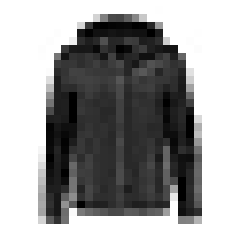

In [18]:
plt.imshow(X_train[0],cmap='binary')
plt.axis(False)

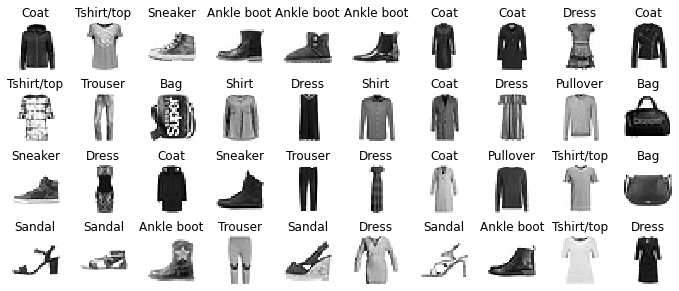

In [64]:
n_rows=4
n_cols=10

plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index=n_cols* row+ col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [19]:
X_train.shape

(55000, 28, 28)

In [30]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [31]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [38]:
model.layers

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


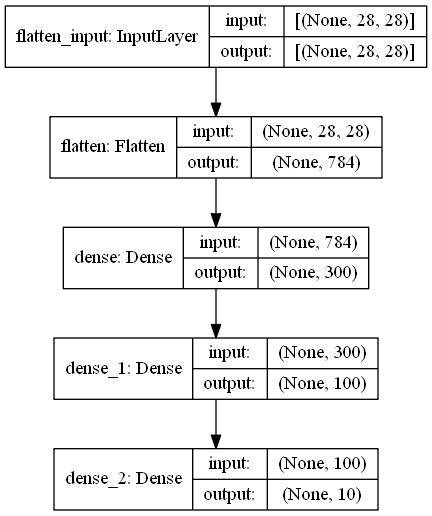

In [40]:
keras.utils.plot_model(model,'my_fashion_mnist_model.png',show_shapes=True)

In [42]:
hidden1=model.layers[1]

In [43]:
hidden1.name

'dense'

In [44]:
weights,bias=hidden1.get_weights()

In [45]:
weights.shape

(784, 300)

In [46]:
bias.shape

(300,)

In [48]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [67]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [68]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7013 - accuracy: 0.7691 - val_loss: 0.5178 - val_accuracy: 0.8200
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4859 - accuracy: 0.8299 - val_loss: 0.4352 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4429 - accuracy: 0.8440 - val_loss: 0.5421 - val_accuracy: 0.7968
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4163 - accuracy: 0.8552 - val_loss: 0.3955 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3981 - accuracy: 0.8611 - val_loss: 0.3798 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3795 - accuracy: 0.8664 - val_loss: 0.3737 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3667 - accuracy: 0.8716 - val_loss: 0.3630 - val_accuracy:

In [58]:
print(history.history)

{'loss': [0.7237027883529663, 0.4842100739479065, 0.4390992820262909, 0.4122525453567505, 0.39386433362960815, 0.37516090273857117, 0.3631591498851776, 0.35162606835365295, 0.3413090407848358, 0.3318001329898834, 0.3238930106163025, 0.3147047460079193, 0.3079393208026886, 0.30182531476020813, 0.29437968134880066, 0.2887613773345947, 0.2837143838405609, 0.2776796221733093, 0.2725788950920105, 0.2671605050563812, 0.26216381788253784, 0.2576014995574951, 0.2534503638744354, 0.2482289969921112, 0.2442322075366974, 0.2404686063528061, 0.23607490956783295, 0.23267623782157898, 0.22828508913516998, 0.22501735389232635], 'accuracy': [0.7643091082572937, 0.8315636515617371, 0.8455818295478821, 0.8566363453865051, 0.8618545532226562, 0.8677454590797424, 0.8715272545814514, 0.875145435333252, 0.878818154335022, 0.8824909329414368, 0.8839818239212036, 0.8866181969642639, 0.8887818455696106, 0.8918545246124268, 0.8942182064056396, 0.8972545266151428, 0.8974727392196655, 0.9002181887626648, 0.902018

In [55]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [57]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


(0.0, 1.0)

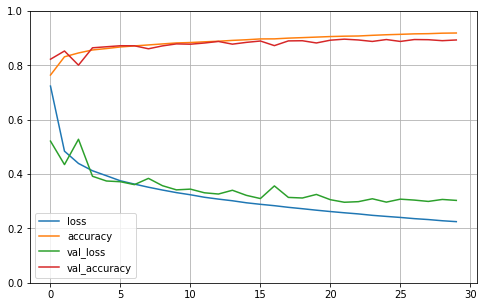

In [61]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid('True')
plt.gca().set_ylim(0,1)


In [69]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8798


[0.33882787823677063, 0.879800021648407]

In [70]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [71]:
y_pred=model.predict_classes(X_new)

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [72]:
y_pred

array([9, 2, 1], dtype=int64)

In [76]:
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


In [77]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

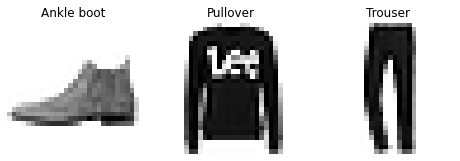

In [81]:
plt.figure(figsize=(8,4))
for index,image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_pred[index]],fontsize=12)

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing=fetch_california_housing()

In [3]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

In [4]:
scaler=StandardScaler()

In [5]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [91]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [92]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.8100 - val_loss: 0.6975
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5505 - val_loss: 0.5031
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4892 - val_loss: 0.4854
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4561 - val_loss: 0.4827
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - val_loss: 0.4683
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4437 - val_loss: 0.4626
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4205 - val_loss: 0.4370
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4107 - val_loss: 0.4370
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.4280
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4002 - val_loss: 0.4254

In [93]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3791


0.3791217505931854

In [94]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

In [96]:
print(y_pred)

[[0.5257442]
 [1.6829325]
 [3.5758224]]


(0.0, 1.0)

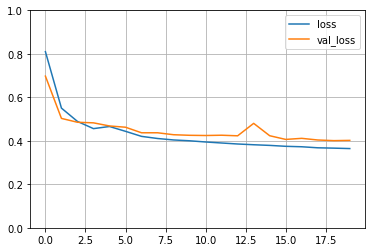

In [104]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss','val_loss'])
plt.grid('On')
plt.gca().set_ylim(0,1)

In [8]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=output)

In [10]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 4ms/step - loss: 4.3469 - val_loss: 3.8060
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.9114 - val_loss: 3.6630
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 3.8344 - val_loss: 3.6446
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 3.7869 - val_loss: 3.7002
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.7515 - val_loss: 3.6412
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.7295 - val_loss: 3.7698
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.7026 - val_loss: 3.5735
Epoch 8/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.6898 - val_loss: 3.5312
Epoch 9/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.6674 - val_loss: 3.7059
Epoch 10/20
1719/1719 [==============================] - 6s 3ms/step - loss: 3.656

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
input_A= keras.layers.Input(shape=[5],name='wide_input')
input_B=keras.layers.Input(shape=[6],name='deep_input')
hidden1= keras.layers.Dense(30,activation='relu')(input_B)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1, name='main_output')(concat)

model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [34]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))

In [35]:
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,
                 validation_data=((X_valid_A,X_valid_B),y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8316 - val_loss: 1.0603
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7245 - val_loss: 0.6143
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6201 - val_loss: 0.5711
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5842 - val_loss: 0.5447
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5608 - val_loss: 0.5245
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5092
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5283 - val_loss: 0.4952
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5174 - val_loss: 0.4851
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5053 - val_loss: 0.4771
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4979 - val_loss: 0.4709

In [36]:
mse_test=model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4613


In [37]:
y_pred=model.predict((X_new_A,X_new_B))

In [38]:
y_pred

array([[2.3766496],
       [1.3892641],
       [1.070886 ]], dtype=float32)

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
input_A=keras.layers.Input(shape=[5],name='wide_output')
input_B=keras.layers.Input(shape=[6],name='deep_output')
hidden1=keras.layers.Dense(30,activation='relu')(input_B)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name='main_output')(concat)
aux_output=keras.layers.Dense(1,name='aux_output')(hidden2)
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

In [45]:
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')

In [47]:
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,
         validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3714 - main_output_loss: 0.3563 - aux_output_loss: 0.5075 - val_loss: 0.4191 - val_main_output_loss: 0.3970 - val_aux_output_loss: 0.6177
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3699 - main_output_loss: 0.3553 - aux_output_loss: 0.5013 - val_loss: 0.3893 - val_main_output_loss: 0.3774 - val_aux_output_loss: 0.4961
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3745 - main_output_loss: 0.3617 - aux_output_loss: 0.4892 - val_loss: 0.3717 - val_main_output_loss: 0.3574 - val_aux_output_loss: 0.5006
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3589 - main_output_loss: 0.3456 - aux_output_loss: 0.4786 - val_loss: 0.3663 - val_main_output_loss: 0.3526 - val_aux_output_loss: 0.4893
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3542 - main_output_loss: 0.3412 - aux_output_loss: 0.4714 - val_loss

In [48]:
total_loss,main_loss,aux_loss=model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3654 - main_output_loss: 0.3569 - aux_output_loss: 0.4422


In [49]:
y_pred_main,y_pred_aux=model.predict([X_new_A,X_new_B])

In [51]:
y_pred_main,y_pred_aux

(array([[1.9581971],
        [1.5370663],
        [1.1225803]], dtype=float32),
 array([[1.6298765],
        [2.1928117],
        [1.1489028]], dtype=float32))

In [57]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1=keras.layers.Dense(units,activation=activation)
        self.hidden2=keras.layers.Dense(units,activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A,input_B=inputs
        hidden1=self.hidden1(input_B)
        hidden2=self.hidden2(hidden1)
        concat=keras.layers.concatenate([input_A,hidden2])
        main_output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return main_output,aux_output

In [59]:
model=WideAndDeepModel(30,activation='relu')

In [60]:
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')

In [61]:
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.9678 - output_1_loss: 0.8116 - output_2_loss: 2.3736 - val_loss: 0.5507 - val_output_1_loss: 0.4901 - val_output_2_loss: 1.0960
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5471 - output_1_loss: 0.4938 - output_2_loss: 1.0264 - val_loss: 0.4908 - val_output_1_loss: 0.4463 - val_output_2_loss: 0.8918
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4905 - output_1_loss: 0.4496 - output_2_loss: 0.8586 - val_loss: 0.4624 - val_output_1_loss: 0.4284 - val_output_2_loss: 0.7681
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4572 - output_1_loss: 0.4264 - output_2_loss: 0.7345 - val_loss: 0.4459 - val_output_1_loss: 0.4203 - val_output_2_loss: 0.6771
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4505 - output_1_loss: 0.4261 - output_2_loss: 0.6692 - val_loss: 0.4321 - val_output_1_loss: 0.4103 - val_ou

In [62]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 2ms/step - loss: 0.3868 - output_1_loss: 0.3762 - output_2_loss: 0.4825


## Saving And Restoring

In [63]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [68]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))

In [69]:
history=model.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))
mse=model.evaluate(X_test,y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8169 - val_loss: 1.5842
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7378 - val_loss: 0.6505
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6104 - val_loss: 0.5649
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5410
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5458 - val_loss: 0.5158
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5256 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5094 - val_loss: 0.4810
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4961 - val_loss: 0.4708
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4853 - val_loss: 0.4613
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4810


In [70]:
model.save('my_keras_model.h5')

In [71]:
model=keras.models.load_model('my_keras_model.h5')

In [74]:
model.predict(X_new)

array([[2.256112 ],
       [1.3031805],
       [1.2488697]], dtype=float32)

In [73]:
X_new=X_test[:3]

In [75]:
model.save_weights('my_keras_weight.ckpt')

In [76]:
model.load_weights('my_keras_weight.ckpt')

## Using callbacks During Trianing

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [101]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True)
history=model.fit(X_train,y_train,epochs=10,
                  validation_data=(X_valid,y_valid),
                  callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.4905 - val_loss: 0.8458
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7623 - val_loss: 0.7172
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6803 - val_loss: 0.6600
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6294 - val_loss: 0.6193
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5930 - val_loss: 0.5879
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5639 - val_loss: 0.5647
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5408 - val_loss: 0.5443
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5219 - val_loss: 0.5289
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5065 - val_loss: 0.5162
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4943 - val_loss: 0.5059

In [85]:
model=keras.models.load_model('my_keras_model.h5')

In [86]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3406


0.3406450152397156

In [102]:
model.compile(loss='mse',optimizer='sgd')

In [103]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.4763 - val_loss: 0.5025
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4480 - val_loss: 0.4535
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4246 - val_loss: 0.4285
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4055 - val_loss: 0.4268
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4045 - val_loss: 0.4319
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4034 - val_loss: 0.4157
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3846 - val_loss: 0.4036
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3748 - val_loss: 0.4135
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3692 - val_loss: 0.3982
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_lo

In [6]:
os.getcwd()

<IPython.core.display.Javascript object>

'E:\\Complete Machine Learning'

In [52]:
os.environ['TENSORBOARD_BINARY'] = '/path/to/envs/my_env/bin/tensorboard'

In [37]:
import os
root_logdir=os.path.join(os.curdir,'my_logs')

def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir,run_id)

run_logdir=get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_07_09_07_35_23'

In [48]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [39]:
run_logdir2=get_run_logdir()

In [40]:
run_logdir2

'.\\my_logs\\run_2021_07_09_07_35_27'

In [41]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer='sgd')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir2)

<IPython.core.display.Javascript object>

In [44]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid),
                 callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 7ms/step - loss: 1.1387 - val_loss: 3.1926
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4251 - val_loss: 1.0798
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.6378
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3733 - val_loss: 0.3562
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3652 - val_loss: 1.3649
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3505 - val_loss: 0.3866
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3518 - val_loss: 1.1028
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3422 - val_loss: 0.5559
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3350 - val_loss: 1.6224
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3435 - val_loss: 0.3508

In [57]:
%tensorboard --logdir="<E:\\Complete Machine Learning\\my_logs\\run_2021_07_09_07_35_27>"

ERROR: Could not find '/path/to/envs/my_env/bin/tensorboard' (set by
the `TENSORBOARD_BINARY` environment variable). Please ensure that
your PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

## Hypermeters Tuning

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
    model.add(keras.Dense(1))
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

In [64]:
keras_reg=tf.keras.layers.Wrapper(sckit_learn.KerasRegressor(build_model))

<IPython.core.display.Javascript object>

NameError: name 'sckit_learn' is not defined

In [65]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [67]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<IPython.core.display.Javascript object>

AttributeError: module 'keras' has no attribute 'wrappers'

In [70]:
pip uninstall keras

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.

In [6]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [7]:
X_test=X_test/255.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-0.5, 27.5, 27.5, -0.5)

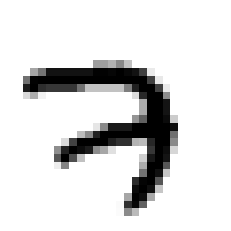

In [11]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')

In [12]:
y_train[0]

7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

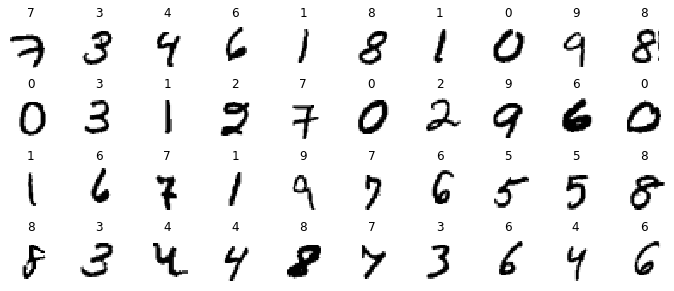

In [23]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index=n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index],fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [25]:
K=keras.backend

In [36]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor=factor
        self.rates=[]
        self.losses=[]
    def on_batch_end(self,batch,logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr,self.model.optimizer.lr*self.factor)

In [37]:
keras.backend.clear_session()

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [39]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [40]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])
expon_lr=ExponentialLearningRate(factor=1.005)

In [41]:
history=model.fit(X_train,y_train,epochs=1,
         validation_data=(X_valid,y_valid),
         callbacks=[expon_lr])

1719/1719 [==============================] - 7s 4ms/step - loss: 5175061388354684784465674240.0000 - accuracy: 0.5927 - val_loss: 2.3911 - val_accuracy: 0.1126


In [48]:
len(expon_lr.rates)

1719

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Loss')

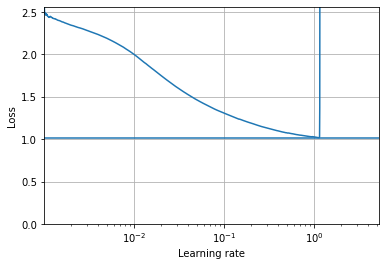

In [57]:
plt.plot(expon_lr.rates,expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates),max(expon_lr.rates),0,expon_lr.losses[0]])
plt.grid('On')
plt.xlabel("Learning rate")
plt.ylabel("Loss")

## Vanishing and Exploding Gradient Descent

In [9]:
def logit(z):
    return 1/(1+np.exp(-z))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-5.0, 5.0, -0.2, 1.2)

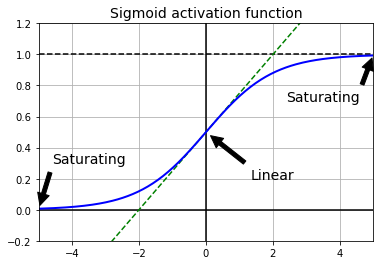

In [11]:
z=np.linspace(-5,5,200)

plt.plot([-5,5],[0,0],'k-')
plt.plot([-5,5],[1,1],'k--')
plt.plot([0,0],[-0.2,1.2],'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z,logit(z),'b-',linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

## Xavier and He Initialization

In [13]:
[name for name in dir(keras.initializers) if  not name.startswith('_')]

<IPython.core.display.Javascript object>

['Constant',
 'ConstantV2',
 'GlorotNormal',
 'GlorotNormalV2',
 'GlorotUniform',
 'GlorotUniformV2',
 'HeNormal',
 'HeNormalV2',
 'HeUniform',
 'HeUniformV2',
 'Identity',
 'IdentityV2',
 'Initializer',
 'LOCAL',
 'LecunNormal',
 'LecunNormalV2',
 'LecunUniform',
 'LecunUniformV2',
 'Ones',
 'OnesV2',
 'Orthogonal',
 'OrthogonalV2',
 'RandomNormal',
 'RandomNormalV2',
 'RandomUniform',
 'RandomUniformV2',
 'TruncatedNormal',
 'TruncatedNormalV2',
 'VarianceScaling',
 'VarianceScalingV2',
 'Zeros',
 'ZerosV2',
 'constant',
 'deserialize',
 'generic_utils',
 'get',
 'glorot_normal',
 'glorot_normalV2',
 'glorot_uniform',
 'glorot_uniformV2',
 'he_normal',
 'he_normalV2',
 'he_uniform',
 'he_uniformV2',
 'identity',
 'init_ops',
 'initializer',
 'initializers_v1',
 'initializers_v2',
 'inspect',
 'keras_export',
 'lecun_normal',
 'lecun_normalV2',
 'lecun_uniform',
 'lecun_uniformV2',
 'normal',
 'one',
 'ones',
 'orthogonal',
 'populate_deserializable_objects',
 'random_normal',
 'rando

In [14]:
keras.layers.Dense(10,activation='relu',kernel_initializer='he_normal')

<IPython.core.display.Javascript object>

In [16]:
he_avg_init=keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                              distribution='uniform')
keras.layers.Dense(10,activation='relu',kernel_initializer=he_avg_init)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
def leaky_relu(z,alpha=0.01):
    return np.maximum(alpha*z,z)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'ELU activation function (alpha=1)')

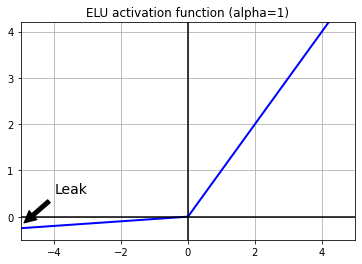

In [28]:
plt.plot(z,leaky_relu(z,0.05),'b-',linewidth=2)
plt.plot([-5,5],[0,0],'k-')
plt.plot([0,0],[-0.5,4.2],'k-')
plt.axis([-5,5,-0.5,4.2])
plt.grid('On')
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title('ELU activation function (alpha=1)')

In [31]:
[name for name in dir(keras.activations) if not name.startswith('_')]

<IPython.core.display.Javascript object>

['ELU',
 'InputSpec',
 'Layer',
 'LeakyReLU',
 'PReLU',
 'ReLU',
 'Softmax',
 'ThresholdedReLU',
 'advanced_activations',
 'backend',
 'constraints',
 'deserialize',
 'deserialize_keras_object',
 'elu',
 'exponential',
 'gelu',
 'get',
 'get_globals',
 'hard_sigmoid',
 'initializers',
 'keras_export',
 'linear',
 'regularizers',
 'relu',
 'selu',
 'serialize',
 'serialize_keras_object',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh',
 'tf',
 'tf_utils']

In [34]:
[name for name in dir(keras.activations) if 'relu' in name.lower()]

<IPython.core.display.Javascript object>

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU', 'relu']

In [4]:
from tensorflow import keras

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100,kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10,activation='softmax')
])

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [46]:
history=model.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 1.3401 - accuracy: 0.5904 - val_loss: 0.8926 - val_accuracy: 0.7168
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8035 - accuracy: 0.7392 - val_loss: 0.7162 - val_accuracy: 0.7692
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6894 - accuracy: 0.7708 - val_loss: 0.6474 - val_accuracy: 0.7906
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6299 - accuracy: 0.7902 - val_loss: 0.5934 - val_accuracy: 0.8074
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5911 - accuracy: 0.8011 - val_loss: 0.5616 - val_accuracy: 0.8158
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5630 - accuracy: 0.8090 - val_loss: 0.5383 - val_accuracy: 0.8218
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5417 - accuracy: 0.8162 - val_loss: 0.5195 - val_accuracy:

In [47]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100,kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10,activation='softmax')
])

In [48]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [49]:
history=model.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3115 - accuracy: 0.6001 - val_loss: 0.9045 - val_accuracy: 0.7076
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8122 - accuracy: 0.7353 - val_loss: 0.7198 - val_accuracy: 0.7634
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6914 - accuracy: 0.7756 - val_loss: 0.6479 - val_accuracy: 0.7890
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6278 - accuracy: 0.7950 - val_loss: 0.5902 - val_accuracy: 0.8042
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5862 - accuracy: 0.8062 - val_loss: 0.5560 - val_accuracy: 0.8148
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5565 - accuracy: 0.8128 - val_loss: 0.5316 - val_accuracy: 0.8208
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5341 - accuracy: 0.8196 - val_loss: 0.5121 - val_accuracy:

#### PReLU outperforms ReLU on large dataset but leads to overfitting in samll dataset

## ELU

In [50]:
def elu(z,alpha=1):
    return np.where(z<0,alpha*(np.exp(z)-1),z)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'ELU activation function ($\\alpha=1$)')

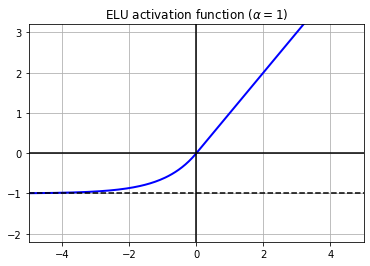

In [61]:
plt.plot(z,elu(z),'b-',linewidth=2)
plt.plot([-5,5],[0,0],'k-')
plt.plot([0,0],[-2.2,4.2],'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.axis([-5,5,-2.2,3.2])
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)')

## Batch Normalization

In [1]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation='elu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='softmax')
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [3]:
bn1=model.layers[1]
[(var.name,var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

In [13]:
history=model.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 28s 4ms/step - loss: 0.6987 - accuracy: 0.7598 - val_loss: 0.3930 - val_accuracy: 0.8658
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4178 - accuracy: 0.8540 - val_loss: 0.3657 - val_accuracy: 0.8708
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3760 - accuracy: 0.8671 - val_loss: 0.3495 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3486 - accuracy: 0.8753 - val_loss: 0.3448 - val_accuracy: 0.8754
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3243 - accuracy: 0.8853 - val_loss: 0.3328 - val_accuracy: 0.8814
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3195 - accuracy: 0.8860 - val_loss: 0.3342 - val_accuracy: 0.8840
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3008 - accuracy: 0.8913 - val_loss: 0.3280 - val_accuracy

In [16]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [18]:
history=model.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9108 - accuracy: 0.6999 - val_loss: 0.6265 - val_accuracy: 0.7944
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6303 - accuracy: 0.7879 - val_loss: 0.5394 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5683 - accuracy: 0.8063 - val_loss: 0.5019 - val_accuracy: 0.8388
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5356 - accuracy: 0.8168 - val_loss: 0.4774 - val_accuracy: 0.8466
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5153 - accuracy: 0.8217 - val_loss: 0.4599 - val_accuracy: 0.8510
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4974 - accuracy: 0.8280 - val_loss: 0.4472 - val_accuracy: 0.8560
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4854 - accuracy: 0.8312 - val_loss: 0.4367 - val_accuracy

In [25]:
def split_dataset(X,y):
    y_5_or_y_6= (y==5 )|( y==6)
    y_A=y[~y_5_or_y_6]
    y_A[y_A>6] -=2
    y_B= (y[y_5_or_y_6]==6).astype(np.float32)
    return((X[~y_5_or_y_6],y_A),
           (X[y_5_or_y_6],y_B))

In [26]:
(X_train_A,y_train_A),(X_train_B,y_train_B)=split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B)=split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B)=split_dataset(X_test,y_test)
X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

In [27]:
X_train_A.shape

(43986, 28, 28)

In [28]:
X_train_B.shape

(200, 28, 28)

In [29]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [30]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [31]:
tf.random.set_seed(42)
np.random.seed(42)

In [34]:
model_A=keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300,100,50,50,50):
    model_A.add(keras.layers.Dense(n_hidden,activation='selu'))
model_A.add(keras.layers.Dense(8,activation='softmax'))

In [35]:
model_A.compile(loss='sparse_categorical_crossentropy',
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=['accuracy'])

In [37]:
history=model_A.fit(X_train_A,y_train_A,epochs=20,
                   validation_data=(X_valid_A,y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 7s 4ms/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3890 - val_accuracy: 0.8677
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3290 - val_accuracy: 0.8822
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2972 - accuracy: 0.8974 - val_loss: 0.2892 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2834 - accuracy: 0.9023 - val_loss: 0.2774 - val_accuracy: 0.9071
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2729 - accuracy: 0.9063 - val_loss: 0.2733 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2640 - accuracy: 0.9091 - val_loss: 0.2719 - val_accuracy:

In [38]:
model_A.save('my_model_A.h5')

In [39]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [40]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [41]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 2s 88ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 22ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 21ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 21ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 20ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 21ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [42]:
model_B.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [50]:
model_A=keras.models.load_model('my_model_A.h5')
model_B_on_A=keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1,activation='sigmoid'))

In [51]:
model_A_clone=keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [54]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False

In [55]:
model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=['accuracy'])

In [58]:
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                        validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True
    
model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=['accuracy'])

history=model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 29ms/step - loss: 0.3553 - accuracy: 0.8550 - val_loss: 0.3749 - val_accuracy: 0.8357
Epoch 2/4
7/7 [==============================] - 0s 19ms/step - loss: 0.3379 - accuracy: 0.8650 - val_loss: 0.3566 - val_accuracy: 0.8469
Epoch 3/4
7/7 [==============================] - 0s 20ms/step - loss: 0.3202 - accuracy: 0.8900 - val_loss: 0.3406 - val_accuracy: 0.8641
Epoch 4/4
7/7 [==============================] - 0s 19ms/step - loss: 0.3047 - accuracy: 0.9050 - val_loss: 0.3262 - val_accuracy: 0.8742


C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/16
7/7 [==============================] - 1s 72ms/step - loss: 0.2642 - accuracy: 0.9300 - val_loss: 0.2515 - val_accuracy: 0.9361
Epoch 2/16
7/7 [==============================] - 0s 22ms/step - loss: 0.2015 - accuracy: 0.9650 - val_loss: 0.2019 - val_accuracy: 0.9584
Epoch 3/16
7/7 [==============================] - 0s 21ms/step - loss: 0.1595 - accuracy: 0.9800 - val_loss: 0.1708 - val_accuracy: 0.9716
Epoch 4/16
7/7 [==============================] - 0s 22ms/step - loss: 0.1331 - accuracy: 0.9850 - val_loss: 0.1495 - val_accuracy: 0.9797
Epoch 5/16
7/7 [==============================] - 0s 21ms/step - loss: 0.1148 - accuracy: 0.9950 - val_loss: 0.1334 - val_accuracy: 0.9838
Epoch 6/16
7/7 [==============================] - 0s 21ms/step - loss: 0.1007 - accuracy: 0.9950 - val_loss: 0.1213 - val_accuracy: 0.9848
Epoch 7/16
7/7 [==============================] - 0s 22ms/step - loss: 0.0899 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9888
Epoch 8/16
7/7 [===========

In [60]:
model_B.evaluate(X_test_B,y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [61]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9935


[0.06348463147878647, 0.9934999942779541]

In [63]:
(100-97.05)/(100-99.35)

4.538461538461503

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
optimizer=keras.optimizers.SGD(lr=0.01,decay=1e-4)

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [14]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

<ipython-input-14-1c2106960292>:3: RuntimeWarning: invalid value encountered in true_divide
  X_train_scaled = (X_train - pixel_means) / pixel_stds
<ipython-input-14-1c2106960292>:4: RuntimeWarning: divide by zero encountered in true_divide
  X_valid_scaled = (X_valid - pixel_means) / pixel_stds
<ipython-input-14-1c2106960292>:4: RuntimeWarning: invalid value encountered in true_divide
  X_valid_scaled = (X_valid - pixel_means) / pixel_stds
<ipython-input-14-1c2106960292>:5: RuntimeWarning: divide by zero encountered in true_divide
  X_test_scaled = (X_test - pixel_means) / pixel_stds
<ipython-input-14-1c2106960292>:5: RuntimeWarning: invalid value encountered in true_divide
  X_test_scaled = (X_test - pixel_means) / pixel_stds


In [26]:
n_epochs=25
history=model.fit(X_train_scaled,y_train,epochs=n_epochs,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 8/25
1719/1719 [============

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

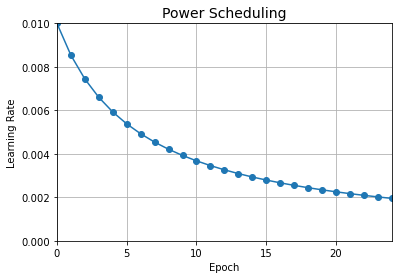

In [29]:
import math

learning_rate=0.01
decay=1e-4
batch_size=32
n_steps_per_epoch=math.ceil(len(X_train)/batch_size)
epochs=np.arange(n_epochs)
lrs=learning_rate/(1+decay*epochs*n_steps_per_epoch)


plt.plot(epochs,lrs,'o-')
plt.axis([0,n_epochs-1,0,0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)

## Exponential Scheduling

lr = lr0 * 0.1**(epoch / s)

In [1]:
def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)

In [8]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch/s)
    return exponential_decay_fn

In [9]:
exponential_decay_fn=exponential_decay(lr0=0.01,s=20)

In [10]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [12]:
n_epochs=25

In [18]:
lr_schedular=keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history=model.fit(X_train_scaled,y_train,epochs=n_epochs,
                 validation_data=(X_valid_scaled,y_valid),
                 callbacks=[lr_schedular])

Epoch 1/25
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 2/25
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 5/25
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 7/25
1719/1719 [==============================] - 13s 7ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 8/25
1719/1719 [=====

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

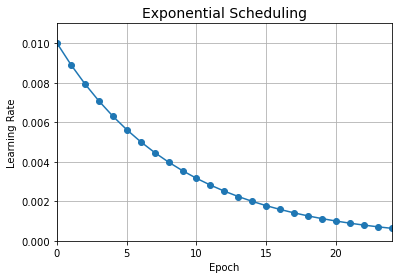

In [20]:
plt.plot(history.epoch,history.history['lr'],'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)

In [1]:
import tensorflow as tf

In [2]:
tf.constant([[1.,2.,3.],[4.,5.,6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [5]:
t=tf.constant([[1.,2.,3.],[4.,5.,6.]])

In [7]:
t.shape

TensorShape([2, 3])

In [9]:
t.dtype

tf.float32

In [10]:
t[:,2:]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[3.],
       [6.]], dtype=float32)>

In [11]:
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [13]:
t[:,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [14]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [15]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [16]:
t@tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [17]:
from tensorflow import keras

In [18]:
K=keras.backend

In [19]:
K.square(K.transpose(t))+10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [20]:
import numpy as np

In [21]:
a=np.array([2.,4.,5.])

### From numpy to tensorflow

In [22]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

### From tensorflow to numpy

In [23]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [24]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [25]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [29]:
t2=tf.constant(40.,dtype=tf.float64)
tf.constant(2.)+tf.cast(30,dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=32.0>

In [30]:
v=tf.Variable([[1.,2.,3.],[4.,5.,6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [31]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [32]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [33]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [34]:
v[:,2].assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [35]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [37]:
v.scatter_nd_update(indices=[[0,0],[1,2]],updates=[100,200])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## Custom Loss Function

### Huber Function

In [38]:
def huber_fn(y_true,y_pred):
    error=y_true-y_pred
    is_small_error= tf.abs(error)<1
    squared_error=tf.square(error)/2
    linear_loss=tf.abs(error)-0.5
    return tf.where(is_small_error,squared_error,linear_loss)

In [ ]:
model=keras.models.load_model('my_model_with_a_custom_loss.h5',custom_objects={'huber_fn':huber_fn})

In [39]:
def create_huber(threshold=1.0):
    def huber_fn(y_true,y_pred):
        error=y_true-y_pred
        is_error_small=tf.abs(error)<threshold
        squared_loss=tf.square(error)/2
        linear_loss=threshold*tf.abs(error)-threshold**2/2
        return tf.where(is_error_small,squared_loss,linear_loss)
    return huber_fn

## Create Custom Loss using Keras

In [40]:
class HuberLoss(keras.losses.Loss):
    def __init__(self,threshold=1.0,**kwargs):
        self.threshold=threshold
        super().__init__(**kwargs)
    def call(self,y_true,y_pred):
        error=y_true-y_pred
        is_small_error=tf.abs(error)<self.threshold
        squared_loss=tf.square(error)/2
        linear_loss= self.threshold*tf.abs(error)-threshold**2/2
        return tf.where(is_small_error,squared_loss,linear_loss)
    def get_config(self):
        base_config=super().get_config()
        return {**base_config,'threshold':self.threshold}

In [ ]:
model=keras.models.load_model('my_model_with_a_custom_loss_class.h5',
                             custom_oobjects={'HuberLoss':HuberLoss})

## Custom Activation Functions,Initializers,Regulizers and Constraints

In [23]:
def my_softplus(z):
    return tf.math.log(tf.exp(z)+1.0)

def my_glorot_initializer(shape,dtype=tf.float32):
    stddev=tf.sqrt(2./shape[0]+shape[1])
    return tf.random.normal(shape,stddev=setdev,dtype=dtype)

def my_l1_regulizer(weights):
    return tf.reduce_sum(tf.abs(0.01*weights))

def my_positive_weights(weights):
    return tf.where(weights<0.,tf.zeros_like(weights),weights)

<IPython.core.display.Javascript object>

In [ ]:
layers= keras.layers.Dense(30, activation=my_softmax,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regulizer,
                          kernel_constriant=my_positive_weights)

### Streaming metrics using Subclass

In [ ]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self,threshold=1.0,**kwargs):
        super().__init__(**kwargs)
        self.threshold=threshold
        self.huber_fn=create_huber(threshold)
        self.total=self.add_weights('total',initializer='zeros')
        self.count=self.add_weights('count',initializer='zeros')
    def update_state(self,y_true,ypred,sample_weights=None):
        metrics=self.huber_fn(y_true,y_pred)
        self.total.assign_add(tf.reduce_sum(metrics))
        self.count.assign_add(tf.cast(tf.size(y_true),tf.float32))
    def result(self):
        return self.total/self.count
    def get_config(self):
        base_config=super().get_config()
        return {**base_config,'threshold':self.threshold}

## Custom layers using Keras subclass

In [43]:
exponential_layer=keras.layers.Lambda(lambda x:tf.exp(x))

#Layers without weights

In [44]:
# Layers with weights

class MyDense(keras.layers.Layer):
    def __init__(self,units,activation=None,**kwargs):
        super().__init__(**kwargs)
        self.units=units
        self.activation=keras.activations.get(activation)
    def build(self,batch_input_shape):
        self.kernel=self.add_weight(
        name='kernel',shape=[batch_input_shape[-1],self.units],
        initializer='glorot_normal')
        self.bias=self.add_weight(
        name='bias',shape=[self.units],initializer='zeros')
        super().build(batch_input_shape)
    def call(self,X):
        return self.activation(X@self.kernel+self.bias)
    def compute_ouyput_shape(self,batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1]+[self.units])
    
    def get_config(self):
        base_config=super().get_config()
        return{**base_config,'units':self.units,
              'activation':keras.activation.serialize(self.activation)}

## Custom layer with multiple inputs and outputs

In [ ]:
class MyMultiLayer(keras.layers.Layer):
    def call(self,X):
        X1,X2=X
        return [X1+X2,X1*X2,X1/X2]
    def compute_output_shape(self,batch_input_shape):
        b1,b2=batch_input_shape
        return[b1,b1,b1]

In [ ]:
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self,stddev,**kwargs):
        super().__init__(**kwargs)
        self.stddev=stddev
        
    def call(Self,training=None):
        if training:
            noise=tf.random.normal(tf.shape(X),stddev=self.stddev)
            return X+noise
        else:
            return X
        
    def compute_output_shape(self,batch_input_shape):
        return batch_input_shape

## Custom Models

In [1]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self,n_layers,n_neurons,**kwargs):
        super().__init__(**kwargs)
        self.hidden=[keras.layers.Dense(n_neurons,activation='elu',kernel_initializer='he_normal')
                    for _ in range(n_layers)]
        
    def call(self,inputs):
        Z=inputs
        for layer in self.hidden:
            Z=layer(Z)
        return inputs+Z

<IPython.core.display.Javascript object>

In [4]:
class ResidualRegressor(keras.Model):
    def __init__(self,output_dim,**kwargs):
        super().__init__(**kwargs)
        self.hidden1=keras.layers.Dense(30,activation='elu',kernek_initializer='he_normal')
        
        self.block1=ResidualBlock(2,30)
        self.block2=ResidualBlock(2,30)
        self.out=keras.layers.Dense(output_dim)
        
    def call(self,inputs):
        Z=self.hidden1(inputs)
        for _ in range(1+3):
            Z=self.block1(Z)
        Z=self.block2(Z)
        return self.out(Z)

<IPython.core.display.Javascript object>

## Custom Model with Custom reconstruction Loss

In [6]:
class ReconstructingRegressor(keras.Model):
    def __init__(self,output_dim,**kwargs):
        super().__init__(**kwargs)
        self.hidden=[keras.layers.Dense(30,activation='selu',
                                         kernel_initializer='lecun_normal')
                      for _ in range(5)]
        self.out=keras.layers.Dense(output_dim)
        
    def build(self,batch_input_shape):
        n_inputs=batch_input_shape[-1]
        self.reconstruct=keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)
        
    def call(self,inputs):
        Z=inputs
        for layer in self.hidden:
            Z=layer(Z)
        reconstruction=self.reconstruction(Z)
        recon_loss=tf.reduce_mean(tf.square(reconstruction-inputs))
        self.add_loss(0.05*recon_loss)
        return self.out(Z)

<IPython.core.display.Javascript object>

## Computing Gradients using Autodiff

In [7]:
def f(w1,w2):
    return 3*w1**2+2*w1*w2

In [8]:
w1,w2=5,3
eps=1e-6
(f(w1+eps,w2)-f(w1,w2))/eps

36.000003007075065

In [9]:
(f(w1,w2+eps)-f(w1,w2))/eps

10.000000003174137

In [10]:
w1,w2=tf.Variable(5.),tf.Variable(3.)
with tf.GradientTape() as tape:
    z=f(w1,w2)

gradients=tape.gradient(z,[w1,w2])
gradients

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [13]:
with tf.GradientTape() as tape:
    z=f(w1,w2)
dz_dw1=tape.gradient(z,w1)
dz_dw1

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

In [14]:
dz_dw2=tape.gradient(z,w2)
dz_dw2

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

In [15]:
with tf.GradientTape(persistent=True) as tape:
    z=f(w1,w2)

    
dz_dw1=tape.gradient(z,w1)
print(dz_dw1)
dz_dw2=tape.gradient(z,w2)
print(dz_dw2)
del tape

<IPython.core.display.Javascript object>

tf.Tensor(36.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)


In [17]:
c1,c2=tf.constant(5.),tf.constant(3.)
with tf.GradientTape() as tape:
    z=f(c1,c2)
    
gradients=tape.gradient(z,[c1,c2])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
gradients

[None, None]

In [19]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z=f(c1,c2)
    
gradients=tape.gradient(z,[c1,c2])
gradients

<IPython.core.display.Javascript object>

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [20]:
def f(w1,w2):
    return 3*w1**2+tf.stop_gradient(2*w1*w2)

with tf.GradientTape() as tape:
    z=f(w1,w2)
    
gradients=tape.gradient(z,[w1,w2])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [25]:
x=tf.Variable([100.])
with tf.GradientTape() as tape:
    z=my_softplus(x)
    
tape.gradient(z,[x])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

## Customs Training Loops

In [2]:
l2_reg=keras.regularizers.l2(0.05)

<IPython.core.display.Javascript object>

In [5]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='elu',kernel_initializer='he_normal',
                      kernel_regularizer=l2_reg),
    keras.layers.Dense(1,kernel_regularizer=l2_reg)
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
def random_batch(X,y,batch_size=32):
    idx=np.random.randint(len(X),size=batch_size)
    return X[idx],y[idx]

In [7]:
 def print_status_bar(iteration,total,loss,metrics=None):
        metrics='-'.join(['{}:{:.4f}'.format(m.name,m.result())
                         for m in [loss]+(metrics or [])])
        end='' if iteration < total else'\n'
        print('\r{}/{}-'.format(iteration,total)+metrics,
        end=end)

In [9]:
n_epochs=5
batch_size=32
n_steps=len(X_train)/batch_size
optimizer=keras.otimizers.Nadam(lr=0.01)
loss_fn=keras.losses.mean_squared_error
mean_loss=keras.metrics.Mean()
metrics=[keras.metrics.MeanAbsoluteError()]


for epoch in range(1,n_epochs+1):
    print('Epoch {}/{}'.format(epoch,n_epochs))
    for step in range(1,n_steps+1):
        X_batch,y_batch=random_batch(X_train_scaled,y_train)
        with tf.GradientTape() as tape:
            y_pred=model(X_batch,training=True)
            main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
            loss=tf.add_n([main_loss]+model.losses)
        gradients=tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch,y_pred)
        print_status_bar(step*batch_size,len(y_train),mean_loss,metrics)
    print_status_bar(len(y_train),len(y_train),mean_loss,metrics)
    for metric in [mean_loss]+metrics:
        metric.reset_states()

NameError: name 'X_train' is not defined

## TensorFlow Functions ad Graphs

In [10]:
def cube(x):
    return x**3

In [11]:
cube(2)

8

In [12]:
cube(tf.constant(2.0))

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [13]:
tf_cube=tf.function(cube)
tf_cube

<IPython.core.display.Javascript object>

In [14]:
tf_cube(3)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [15]:
@tf.function
def tf_cube(x):
    return x**3

<IPython.core.display.Javascript object>

In [16]:
tf_cube.python_function(2)

8

In [18]:
tf.autograph.to_code(tf_cube.python_function)

<IPython.core.display.Javascript object>

"def tf__tf_cube(x):\n    with ag__.FunctionScope('tf_cube', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n        do_return = False\n        retval_ = ag__.UndefinedReturnValue()\n        try:\n            do_return = True\n            retval_ = (ag__.ld(x) ** 3)\n        except:\n            do_return = False\n            raise\n        return fscope.ret(retval_, do_return)\n"

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 88s 1us/step


In [5]:
X_train_full.shape,y_train_full.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))

<IPython.core.display.Javascript object>

In [9]:
model.add(keras.layers.Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [10]:
optimizer=keras.optimizers.Nadam(lr=1e-3)

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [20]:
%load_ext tensorboard

In [49]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [42]:
X_train=X_train_full[5000:]
y_train=y_train_full[5000:]
X_valid=X_train_full[:5000]
y_valid=y_train_full[:5000]

In [43]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb=keras.callbacks.ModelCheckpoint('my_cifar.h5',save_best_only=True)

callbacks=[early_stopping_cb,model_checkpoint_cb]

In [48]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((45000, 32, 32, 3), (45000, 1), (5000, 32, 32, 3), (5000, 1))

In [51]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

<IPython.core.display.Javascript object>

In [52]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [53]:
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [54]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [55]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)

In [56]:
callbacks = [early_stopping_cb, model_checkpoint_cb]

In [57]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 26s 15ms/step - loss: 4.0822 - accuracy: 0.1705 - val_loss: 2.1179 - val_accuracy: 0.2326
Epoch 2/100
1407/1407 [==============================] - 20s 14ms/step - loss: 2.0592 - accuracy: 0.2462 - val_loss: 2.1213 - val_accuracy: 0.2340
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.9363 - accuracy: 0.2911 - val_loss: 2.0175 - val_accuracy: 0.2702
Epoch 4/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.8588 - accuracy: 0.3209 - val_loss: 1.8617 - val_accuracy: 0.3344
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7975 - accuracy: 0.3451 - val_loss: 1.8554 - val_accuracy: 0.3308
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7525 - accuracy: 0.3660 - val_loss: 1.7481 - val_accuracy: 0.3714
Epoch 7/100
1407/1407 [==============================] - 20s 15ms/step - loss: 1.7116 - accuracy: 0.3770 - val_loss: 1

In [60]:
model=keras.models.load_model('my_cifar10_model.h5')
model.evaluate(X_valid,y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.5223 - accuracy: 0.4720


[1.522278070449829, 0.47200000286102295]

In [61]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

for _ in range(100):
    model.add(keras.layers.Dense(100,kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10,activation='softmax'))
             
optimizer=keras.optimizers.Nadam(lr=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb=keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
callbacks=[early_stopping_cb,model_checkpoint_cb]
model.fit(X_train,y_train,epochs=100,
         validation_data=(X_valid,y_valid),
         callbacks=callbacks)

<IPython.core.display.Javascript object>

Epoch 1/100
1407/1407 [==============================] - 202s 90ms/step - loss: 2.3057 - accuracy: 0.1324 - val_loss: 2.1915 - val_accuracy: 0.1798
Epoch 2/100
1407/1407 [==============================] - 118s 84ms/step - loss: 2.1337 - accuracy: 0.2001 - val_loss: 2.0316 - val_accuracy: 0.2260
Epoch 3/100
1407/1407 [==============================] - 117s 83ms/step - loss: 2.0476 - accuracy: 0.2419 - val_loss: 1.9808 - val_accuracy: 0.2524
Epoch 4/100
1407/1407 [==============================] - 110s 78ms/step - loss: 1.9809 - accuracy: 0.2698 - val_loss: 2.0017 - val_accuracy: 0.2716
Epoch 5/100
1407/1407 [==============================] - 118s 84ms/step - loss: 2.0267 - accuracy: 0.2480 - val_loss: 2.1403 - val_accuracy: 0.1916
Epoch 6/100
1407/1407 [==============================] - 110s 79ms/step - loss: 2.0963 - accuracy: 0.2124 - val_loss: 2.0708 - val_accuracy: 0.2022
Epoch 7/100
1407/1407 [==============================] - 121s 86ms/step - loss: 2.1295 - accuracy: 0.2035 - val_

In [62]:
model.evaluate(X_valid,y_valid)

157/157 [==============================] - 2s 14ms/step - loss: 2.8092 - accuracy: 0.1612


[2.8092072010040283, 0.16120000183582306]

In [65]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10,activation='softmax'))

optimizer=keras.optimizers.Nadam(lr=7e-4)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
modelcheckpoint_cb=keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5",save_best_only=True)

callbacks=[early_stopping_cb,modelcheckpoint_cb]


X_means=X_train.mean(axis=0)
X_stds =X_train.std(axis=0)
X_train_scaled= (X_train-X_means)/X_stds
X_valid_scaled=(X_valid-X_means)/X_stds
X_test_scaled=(X_test-X_means)/X_stds
model.fit(X_train_scaled,y_train,epochs=100,
         validation_data=(X_valid_scaled,y_valid),
         callbacks=[callbacks])

<IPython.core.display.Javascript object>

Epoch 1/100
1407/1407 [==============================] - 64s 15ms/step - loss: 1.9240 - accuracy: 0.3048 - val_loss: 1.7858 - val_accuracy: 0.3608
Epoch 2/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6963 - accuracy: 0.3956 - val_loss: 1.6682 - val_accuracy: 0.4038
Epoch 3/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6006 - accuracy: 0.4345 - val_loss: 1.6336 - val_accuracy: 0.4228
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5362 - accuracy: 0.4568 - val_loss: 1.6275 - val_accuracy: 0.4344
Epoch 5/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.4803 - accuracy: 0.4791 - val_loss: 1.6080 - val_accuracy: 0.4420
Epoch 6/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.4371 - accuracy: 0.4968 - val_loss: 1.5539 - val_accuracy: 0.4554
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3953 - accuracy: 0.5123 - val_loss: 1

In [66]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 2s 5ms/step - loss: 1.4594 - accuracy: 0.5086


[1.4594459533691406, 0.5085999965667725]

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu',
                                kernel_initializer='lecun_normal'))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation='softmax'))

optimizer=keras.optimizers.Nadam(lr=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy']
             )
early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb=keras.callbacks.ModelCheckpoint('my_cifar10_alpha_drop_out_model.h5',save_best_only=True)

callbacks=[early_stopping_cb, model_checkpoint_cb]

X_means=X_train.mean()
X_stds=X_train.std()
X_train_scaled= (X_train-X_means)/X_stds
X_valid_scaled= (X_valid-X_means)/X_stds
X_test_scaled= (X_test-X_means)/X_stds

model.fit(X_train_scaled,y_train,epochs=100,
         validation_data=(X_valid_scaled,y_valid),
         callbacks=callbacks)

<IPython.core.display.Javascript object>

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1407/1407 [==============================] - 43s 17ms/step - loss: 1.8855 - accuracy: 0.3284 - val_loss: 1.7785 - val_accuracy: 0.3870
Epoch 2/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6636 - accuracy: 0.4134 - val_loss: 1.6878 - val_accuracy: 0.4050
Epoch 3/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.5714 - accuracy: 0.4498 - val_loss: 1.6439 - val_accuracy: 0.4280
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5037 - accuracy: 0.4751 - val_loss: 1.5909 - val_accuracy: 0.4422
Epoch 5/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4467 - accuracy: 0.4902 - val_loss: 1.5723 - val_accuracy: 0.4680
Epoch 6/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.4000 - accuracy: 0.5128 - val_loss: 1.4917 - val_accuracy: 0.4898
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.3572 - accuracy: 0.5264 - val_loss: 1

In [73]:
model=keras.models.load_model('my_cifar10_alpha_drop_out_model.h5')
model.evaluate(X_valid_scaled,y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 1.4800 - accuracy: 0.4898


[1.480034589767456, 0.48980000615119934]

## The Data API

In [1]:
import tensorflow as tf
from tensorflow import keras

In [13]:
X=tf.range(10)
dataset=tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [4]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [14]:
dataset=dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [15]:
dataset=dataset.map(lambda x: x*2)

In [16]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [17]:
dataset=dataset.unbatch()

In [20]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [19]:
dataset=dataset.filter(lambda x:x<10)

In [21]:
tf.random.set_seed(42)

dataset=tf.data.Dataset.range(10).repeat(3)
dataset=dataset.shuffle(buffer_size=3,seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


## Split California Dataset into multiple CSV files

In [100]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing= fetch_california_housing()

X_train_full,X_test,y_train_full,y_test= train_test_split(housing.data,
                                                                housing.target.reshape(-1,1),random_state=42)

In [101]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)
scaler= StandardScaler()
scaler.fit(X_train)
X_means=scaler.mean_
X_stds=scaler.scale_

In [5]:
def save_into_multiple_files(data,name_prefix,header=None,n_parts=10):
    housing_dir=os.path.join('datasets','housing')
    os.makedirs(housing_dir,exist_ok=True)
    path_format=os.path.join(housing_dir,"my_{}_{:02d}.csv")
    
    filepaths=[]
    m= len(data)
    for file_indx, row_indices in enumerate(np.array_split(np.arange(m),n_parts)):
        part_csv= path_format.format(name_prefix,file_indx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [6]:
train_data= np.c_[X_train,y_train]
valid_data= np.c_[X_valid,y_valid]
test_data= np.c_[X_test,y_test]

header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)


train_filepaths= save_into_multiple_files(train_data,'train',header,n_parts=20)
valid_filepaths= save_into_multiple_files(valid_data,'valid',header,n_parts=10)
test_filepaths= save_into_multiple_files(test_data,'test',header,n_parts=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import pandas as pd
pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [48]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(),end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [50]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

## Building an Input Pipeline

In [51]:
filepath_datasets=tf.data.Dataset.list_files(train_filepaths,seed=42)

In [52]:
for file in filepath_datasets:
    print(file)

tf.Tensor(b'datasets\\housing\\my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_04.csv', sh

In [53]:
n_readers=5
dataset= filepath_datasets.interleave(lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
                                     cycle_length=n_readers)

In [55]:
for line in dataset.take(5):
    print(line.numpy())

b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'
b'1.6571,34.0,4.454976303317536,1.0876777251184835,1358.0,3.2180094786729856,37.94,-122.35,1.052'
b'3.8456,35.0,5.461346633416459,0.9576059850374065,1154.0,2.8778054862842892,37.96,-122.05,1.598'
b'5.9522,26.0,6.196521739130435,1.0069565217391305,1479.0,2.5721739130434784,34.5,-119.75,4.384'
b'3.226,52.0,5.372469635627531,0.9473684210526315,1157.0,2.3421052631578947,37.96,-121.31,1.076'


## How to set default values in files

In [56]:
record_defaults=[0,np.nan,tf.constant(np.nan,dtype=tf.float64),'Hello',tf.constant([])]
parsed_fields= tf.io.decode_csv('1,2,3,4,5',record_defaults)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [60]:
parsed_fields=tf.io.decode_csv(',,,,5',record_defaults)

In [61]:
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [65]:
try:
    parsed_fields=tf.io.decode_csv(',,,,',record_defaults)
except tf.errors.InvalidArgumentError as ex:
    
    print(ex)
    

Field 4 is required but missing in record 0! [Op:DecodeCSV]


In [67]:
try:
    parsed_fields=tf.io.decode_csv('1,2,3,4,5,6,7',record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [68]:
X_train.shape

(11610, 8)

In [8]:
n_inputs=8

@tf.function
def preprocess(line):
    defs=[0.]*n_inputs+[tf.constant([],dtype=tf.float32)]
    fields=tf.io.decode_csv(line,record_defaults=defs)
    x=tf.stack(fields[:-1])
    y=tf.stack(fields[-1:])
    return (x - X_means)/X_stds,y
               

In [75]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

## Reading csv Dataset

In [2]:
def csv_reader_dataset(filepaths,repeat=1,n_readers=5,n_read_threads=None, shuffle_buffer_size=10000,
                      n_parse_threads=5,batch_size=32):
    dataset=tf.data.Dataset.list_files(filepaths)
    dataset=dataset.interleave(
             lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
                       cycle_length=n_readers,num_parallel_calls=n_read_threads)
    dataset=dataset.map(preprocess,num_parallel_calls=n_parse_threads)
    dataset=dataset.shuffle(shuffle_buffer_size).repeat(repeat)
    return dataset.batch(batch_size).prefetch(1)

In [81]:
tf.random.set_seed(42)

train_set=csv_reader_dataset(train_filepaths,batch_size=3)
for X_batch,y_batch in  train_set.take(2):
    print('X =',X_batch,X_batch.shape)
    print('y =',y_batch)

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32) (3, 8)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)
X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32) (3, 8)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)


## Using the Dataset with tf.keras

In [1]:
import tensorflow as tf
from tensorflow import keras

In [43]:
train_set=csv_reader_dataset(train_filepaths,repeat=None)
valid_set=csv_reader_dataset(valid_filepaths)
test_set=csv_reader_dataset(test_filepaths)

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

<IPython.core.display.Javascript object>

In [15]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\Manan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
batch_size=32
model.fit(train_set,epochs=10,
         validation_data=valid_set)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6356 - val_loss: 0.6116
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5989 - val_loss: 0.5641
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5552
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5487 - val_loss: 0.5164
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5291 - val_loss: 0.5161
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5139 - val_loss: 0.4818
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5000 - val_loss: 0.4675
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4884 - val_loss: 0.4556
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4782 - val_loss: 0.4462
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4692 - val_loss: 0.4441

In [22]:
model.evaluate(test_set)

162/162 [==============================] - 0s 1ms/step - loss: 0.4594


0.45942363142967224

In [25]:
new_set=test_set.take(3).map(lambda X, y:X)
model.predict(new_set)

array([[2.4970903 ],
       [1.2567453 ],
       [2.8914104 ],
       [2.450211  ],
       [0.7716022 ],
       [2.8472013 ],
       [1.8033531 ],
       [2.1148415 ],
       [2.878858  ],
       [1.262438  ],
       [0.8062532 ],
       [0.96509326],
       [2.4804223 ],
       [1.9828212 ],
       [1.8070251 ],
       [2.5628695 ],
       [1.6612543 ],
       [2.6812656 ],
       [1.5586767 ],
       [1.9605913 ],
       [0.590649  ],
       [1.8115371 ],
       [3.2910624 ],
       [3.2067294 ],
       [3.8014817 ],
       [1.4847451 ],
       [0.64136696],
       [2.4537838 ],
       [0.7474352 ],
       [2.597303  ],
       [0.9728991 ],
       [1.9856448 ],
       [1.8834372 ],
       [1.3425949 ],
       [2.8099856 ],
       [2.8004699 ],
       [2.5726008 ],
       [5.6296206 ],
       [1.9493766 ],
       [1.3957543 ],
       [0.76083565],
       [1.4812067 ],
       [2.6858606 ],
       [2.7200623 ],
       [1.4592679 ],
       [1.8855432 ],
       [0.95490324],
       [2.941

In [24]:
new_set

<MapDataset shapes: (None, 8), types: tf.float32>

In [44]:
optimizer=keras.optimizers.Nadam(0.01)
loss_fn=keras.losses.mean_squared_error

n_epochs=5
batch_size=32
n_steps_per_epoch=len(X_train)// batch_size
total_steps=n_epochs*n_steps_per_epoch
global_step=0
for X_batch,y_batch in train_set.take(total_steps):
    global_step +=1
    print('\rGlobal_Step {}/{}'.format(global_step,total_steps),end="")
    with tf.GradientTape() as tape:
        y_pred=model(X_batch)
        main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
        loss=tf.add_n([main_loss]+model.losses)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

Global_Step 1810/1810

In [45]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rGlobal step", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


In [47]:
with tf.io.TFRecordWriter('my_data.tfrecord') as f:
    f.write(b"This is the First Record")
    f.write(b"This is the Second Record")

In [50]:
filepaths=["my_data.tfrecord"]
dataset=tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the First Record', shape=(), dtype=string)
tf.Tensor(b'This is the Second Record', shape=(), dtype=string)


In [52]:
filepaths=["my_test_{}.tfrecord".format(i) for i in range(5)]
for i,filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write(" File {} record {} ".format(i,j).encode('utf-8'))
            
dataset=tf.data.TFRecordDataset(filepaths,num_parallel_reads=3)

for item in dataset:
    print(item)

tf.Tensor(b' File 0 record 0 ', shape=(), dtype=string)
tf.Tensor(b' File 1 record 0 ', shape=(), dtype=string)
tf.Tensor(b' File 2 record 0 ', shape=(), dtype=string)
tf.Tensor(b' File 0 record 1 ', shape=(), dtype=string)
tf.Tensor(b' File 1 record 1 ', shape=(), dtype=string)
tf.Tensor(b' File 2 record 1 ', shape=(), dtype=string)
tf.Tensor(b' File 0 record 2 ', shape=(), dtype=string)
tf.Tensor(b' File 1 record 2 ', shape=(), dtype=string)
tf.Tensor(b' File 2 record 2 ', shape=(), dtype=string)
tf.Tensor(b' File 3 record 0 ', shape=(), dtype=string)
tf.Tensor(b' File 4 record 0 ', shape=(), dtype=string)
tf.Tensor(b' File 3 record 1 ', shape=(), dtype=string)
tf.Tensor(b' File 4 record 1 ', shape=(), dtype=string)
tf.Tensor(b' File 3 record 2 ', shape=(), dtype=string)
tf.Tensor(b' File 4 record 2 ', shape=(), dtype=string)


In [53]:
options= tf.io.TFRecordOptions(compression_type='GZIP')
with tf.io.TFRecordWriter('my_compressed.tfrecord',options) as f:
    f.write(b'This is the first record')
    f.write(b'This is the second record')

In [54]:
dataset=tf.data.TFRecordDataset(['my_compressed.tfrecord'],compression_type="GZIP")

for item in dataset:
    print(item)
    

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'This is the second record', shape=(), dtype=string)


In [61]:
%%writefile person.proto
syntax="proto3";
message Person{
    string name=1
    int32 id =2
    repeated  string email=3
}

Writing person.proto


In [67]:
os.chdir('C:\\Users\\Manan\\AppData\\Local\\Programs\\Python\\Python36\\Scripts')

<IPython.core.display.Javascript object>

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Manan\\AppData\\Local\\Programs\\Python\\Python36\\Scripts'

In [68]:
!pip install virtualenv

In [71]:
!pip install --user ipykernel

In [79]:
os.getcwd()

<IPython.core.display.Javascript object>

'E:\\Complete Machine Learning'

In [82]:
os.chdir('E:\\Complete Machine Learning\\protoc\\bin')

<IPython.core.display.Javascript object>

In [85]:
!protoc --dart_out=grpc:lib/src/generated -Iblogpb blogpb/blog.proto    

blogpb: warning: directory does not exist.
Could not make proto path relative: blogpb/blog.proto: No such file or directory


In [63]:
!ls person*

'ls' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'protobuf'

In [56]:
!pip  install protobuf

In [28]:
total_steps,n_steps_per_epoch

(1810, 362)

In [17]:
train_set

<PrefetchDataset shapes: ((None, 8), (None, 1)), types: (tf.float32, tf.float32)>

In [18]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [20]:
len(X_train)//32

362

In [2]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Overwriting person.proto


In [4]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [6]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person)  # display the Person

name: "Al"
id: 123
email: "a@b.com"



In [7]:
print(person)

name: "Al"
id: 123
email: "a@b.com"



In [8]:
person.name

'Al'

In [9]:
person.name='Alice'

In [10]:
person.email

['a@b.com']

In [11]:
person.email[0]

'a@b.com'

In [12]:
person.email.append('c@d.com')

In [13]:
s=person.SerializeToString()

In [14]:
s

b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [15]:
person2=Person()

In [16]:
person2.ParseFromString(s)

27

In [18]:
person2==person

True

In [19]:
person2

name: "Alice"
id: 123
email: "a@b.com"
email: "c@d.com"

In [20]:
person

name: "Alice"
id: 123
email: "a@b.com"
email: "c@d.com"

In [24]:
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };

SyntaxError: invalid syntax (<ipython-input-24-e29d527d264e>, line 3)

In [22]:
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
person_example=Example(
       features=Features(
       feature={
           "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
           "id"  : Feature(int64_list=Int64List(value=[123])),
           "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                        b"c@d.com"]))
       
       
       }))

In [28]:
with tf.io.TFRecordWriter("my_contact.tfrecord") as f:
    f.write(person_example.SerializeToString())

<IPython.core.display.Javascript object>

In [32]:
feature_description={
    "name":tf.io.FixedLenFeature([],tf.string,default_value=""),
    "id":tf.io.FixedLenFeature([],tf.int64,default_value=0),
    "emails":tf.io.VarLenFeature(tf.string),
}

for serialized_example in tf.data.TFRecordDataset(["my_contact.tfrecord"]):
    parse_example=tf.io.parse_single_example(serialized_example,feature_description)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
parse_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x150ea1cf490>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [34]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x150ea2aaa30>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [35]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [36]:
tf.sparse.to_dense(parsed_example["emails"],default_value=b"")

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [39]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

## Putting Images in TFRecords

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

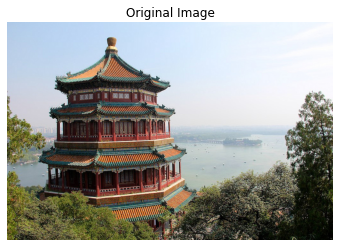

In [41]:
from sklearn.datasets import load_sample_images

img=load_sample_images()["images"][0]
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [47]:
data=tf.io.encode_jpeg(img)
example_with_image= Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))
}))

serialized_example=example_with_image.SerializeToString()

<IPython.core.display.Javascript object>

In [52]:
feature_description={"image":tf.io.VarLenFeature(tf.string)}
example_with_image=tf.io.parse_single_example(serialized_example,feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

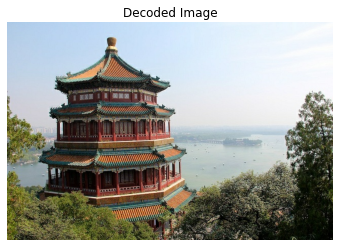

In [54]:
plt.imshow(decoded_img)
plt.axis('off')
plt.title('Decoded Image')
plt.show()

## Putting Tensors and Sparse Tensors in TFRecords

In [57]:
t=tf.constant([[0.,1.],[2.,3.],[4.,5.]])
s=tf.io.serialize_tensor(t)
s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [58]:
tf.io.parse_tensor(s,out_type=tf.float32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [60]:
serialized_sparse=tf.io.serialize_sparse(parsed_example["emails"])

<IPython.core.display.Javascript object>

In [61]:
serialized_sparse

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x01"\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"\x10\x07\x07a@b.comc@d.com',
       b'\x08\t\x12\x04\x12\x02\x08\x01"\x08\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [62]:
dataset=tf.data.TFRecordDataset(["my_contact.tfrecord"]).batch(10)
for serialized_example in dataset:
    parsed_example=tf.io.parse_example(serialized_example,feature_description)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
parsed_example

{'image': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x150eccea790>}

## Handling Lists of Lists using Sequential Example Protobuf

In [72]:
FeatureList=tf.train.FeatureList
FeatureLists=tf.train.FeatureLists
SequenceExample=tf.train.SequenceExample

context=Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title":Feature(bytes_list=BytesList(value=[b"A",b"desert",b"place",b"."])),
    "pub_date":Feature(int64_list=Int64List(value=[1623,12,25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def word_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                             for word in words]))

content_feature= [word_to_feature(sentence) for sentence in content]
comments_feature= [word_to_feature(comment) for comment in comments]

sequence_example= SequenceExample(
        context=context,
        feature_lists=FeatureLists(feature_list={
            "content":FeatureList(feature=content_feature),
            "comments":FeatureList(feature=comments_feature)
        }))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [79]:
serialized_sequence_example=sequence_example.SerializeToString()

In [80]:
serialized_sequence_example

b"\nL\n\x12\n\tauthor_id\x12\x05\x1a\x03\n\x01{\n \n\x05title\x12\x17\n\x15\n\x01A\n\x06desert\n\x05place\n\x01.\n\x14\n\x08pub_date\x12\x08\x1a\x06\n\x04\xd7\x0c\x0c\x19\x12\xd0\x01\nb\n\x08comments\x12V\n&\n$\n\x04When\n\x03the\n\nhurlyburly\n\x02's\n\x04done\n\x01.\n,\n*\n\x04When\n\x03the\n\x06battle\n\x02's\n\x04lost\n\x03and\n\x03won\n\x01.\nj\n\x07content\x12_\n*\n(\n\x04When\n\x05shall\n\x02we\n\x05three\n\x04meet\n\x05again\n\x01?\n1\n/\n\x02In\n\x07thunder\n\x01,\n\tlightning\n\x01,\n\x02or\n\x02in\n\x04rain\n\x01?"

In [83]:
context_feature_description={
    "author_id":tf.io.FixedLenFeature([],tf.int64,default_value=0),
    "title":tf.io.VarLenFeature(tf.string),
    "pub_date":tf.io.FixedLenFeature([3],tf.int64,default_value=[0,0,0]),
}
sequence_feature_description={
    "content":tf.io.VarLenFeature(tf.string),
    "comments":tf.io.VarLenFeature(tf.string),
}
parsed_context,parsed_feature_lists = tf.io.parse_single_sequence_example(
      serialized_sequence_example,context_feature_description,sequence_feature_description)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
parsed_context

{'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x150ecc4ddc0>,
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25], dtype=int64)>}

In [85]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [87]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x150ecb62a60>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x150ecb55d90>}

In [88]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<IPython.core.display.Javascript object>

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


## The Features API

In [89]:
os.getcwd()

<IPython.core.display.Javascript object>

'E:\\Complete Machine Learning'

In [3]:
os.chdir('E:\\Complete Machine Learning\\datasets\\housing')

<IPython.core.display.Javascript object>

In [4]:
housing=pd.read_csv('housing.csv')

<IPython.core.display.Javascript object>

In [109]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [94]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [96]:
housing_median_age=tf.feature_column.numeric_column("housing_median_age")

<IPython.core.display.Javascript object>

In [97]:
housing_median_age

NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [102]:
age_mean,age_std=X_means[1],X_stds[1]
housing_median_age=tf.feature_column.numeric_column(
      "hosuing_median_age",normalizer_fn=lambda x: (x-age_mean)/age_std)

<IPython.core.display.Javascript object>

In [104]:
housing_median_age

NumericColumn(key='hosuing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <lambda> at 0x00000150EFD8F430>)

In [106]:
median_income=tf.feature_column.numeric_column("median_income")
bucketized_income=tf.feature_column.bucketized_column(median_income,boundaries=[1.5,3.,4.5,6.])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
bucketized_income

BucketizedColumn(source_column=NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1.5, 3.0, 4.5, 6.0))

In [111]:
ocean_prox_vocab=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity=tf.feature_column.categorical_column_with_vocabulary_list(
                    "ocean_proximity",ocean_prox_vocab)

<IPython.core.display.Javascript object>

In [112]:
city_hash=tf.feature_column.categorical_column_with_hash_bucket("city",hash_bucket_size=1000)
city_hash

<IPython.core.display.Javascript object>

HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

In [113]:
bucketized_age=tf.feature_column.bucketized_column(housing_median_age,boundaries=[-1.0,-0.5,0.,0.5,1.0])

<IPython.core.display.Javascript object>

In [115]:
age_and_ocean_proximity=tf.feature_column.crossed_column([bucketized_age,ocean_proximity],hash_bucket_size=1000)

<IPython.core.display.Javascript object>

In [117]:
latitude=tf.feature_column.numeric_column("latitude")
longitude=tf.feature_column.numeric_column("longitude")
bucketized_latitude=tf.feature_column.bucketized_column(
          latitude,boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude=tf.feature_column.bucketized_column(
             longitude,boundaries=list(np.linspace(-125., -114., 20 - 1)))
location=tf.feature_column.crossed_column([bucketized_latitude,bucketized_longitude],hash_bucket_size=1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
latitude=tf.feature_column.numeric_column("latitude")
longitude=tf.feature_column.numeric_column("longitude")
bucketized_latitude=tf.feature_column.bucketized_column(
          latitude,boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude=tf.feature_column.bucketized_column(
             longitude,boundaries=list(np.linspace(-125., -114., 20 - 1)))
location=tf.feature_column.crossed_column([bucketized_latitude,bucketized_longitude],hash_bucket_size=1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
ocean_proximity_one_hot=tf.feature_column.indicator_column(ocean_proximity)

<IPython.core.display.Javascript object>

In [119]:
ocean_proximity_embed=tf.feature_column.embedding_column(ocean_proximity,dimension=2)

<IPython.core.display.Javascript object>

### Using Feature Column for Parsing

In [121]:
median_house_value=tf.feature_column.numeric_column("median_house_value")

<IPython.core.display.Javascript object>

In [124]:
columns=[housing_median_age,median_house_value]
fetaure_descriptions=tf.feature_column.make_parse_example_spec(columns)

<IPython.core.display.Javascript object>

In [126]:
fetaure_descriptions

{'hosuing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [127]:
ocean_proximity_embed

EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x00000150F103F880>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True)

In [128]:
ocean_proximity_one_hot

IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0))

In [129]:
with tf.io.TFRecordWriter("my_data_with_features.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=[x])),
            "median_house_value": Feature(float_list=FloatList(value=[y]))
        }))
        f.write(example.SerializeToString())

<IPython.core.display.Javascript object>

In [130]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, fetaure_descriptions)
    targets = examples.pop("median_house_value") # separate the targets
    return examples, targets

batch_size = 32
dataset = tf.data.TFRecordDataset(["my_data_with_features.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
columns_without_target = columns[:-1]
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: module 'keras.layers' has no attribute 'DenseFeatures'

## Encoding categorical fetature using embeddings

In [1]:
vocab=["<1H OCEAN","INLAND","NEAR OCEAN","NEAR BAY","ISLAND"]

In [5]:
indices=tf.range(len(vocab),dtype=tf.int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
table_init=tf.lookup.KeyValueTensorInitializer(vocab,indices)
num_oov_bucket=2
table=tf.lookup.StaticVocabularyTable(table_init,num_oov_bucket)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
categories=tf.constant(['NEAR BAY','DESERT','INLAND','INLAND'])

<IPython.core.display.Javascript object>

In [12]:
cat_indices=table.lookup(categories)

In [13]:
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [14]:
cat_one_hot=tf.one_hot(cat_indices,depth=len(vocab)+num_oov_bucket)

<IPython.core.display.Javascript object>

In [15]:
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [16]:
embedding_dim=2
embed_init=tf.random.uniform([len(vocab)+num_oov_bucket,embedding_dim])
embedding_matrix=tf.Variable(embed_init)
embedding_matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.11868262, 0.8695353 ],
       [0.06778502, 0.7862359 ],
       [0.6723304 , 0.7754009 ],
       [0.98478246, 0.48124158],
       [0.16648674, 0.5375881 ],
       [0.04461348, 0.82495975],
       [0.02613616, 0.62270355]], dtype=float32)>

In [17]:
categories=tf.constant(['NEAR BAY','DESERT','INLAND','INLAND'])
cat_indices=table.lookup(categories)
cat_indices

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [18]:
tf.nn.embedding_lookup(embedding_matrix,cat_indices)

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.98478246, 0.48124158],
       [0.04461348, 0.82495975],
       [0.06778502, 0.7862359 ],
       [0.06778502, 0.7862359 ]], dtype=float32)>

In [19]:
embedding=keras.layers.Embedding(input_dim=len(vocab)+num_oov_bucket,
                                output_dim=embedding_dim)

<IPython.core.display.Javascript object>

In [20]:
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.0376644 ,  0.0007907 ],
       [-0.0252908 , -0.03994777],
       [ 0.00331319,  0.01864098],
       [ 0.00331319,  0.01864098]], dtype=float32)>

In [23]:
regular_inputs=keras.layers.Input(shape=[8])
categories=keras.layers.Input(shape=[],dtype=tf.string)
cat_indices=keras.layers.Lambda(lambda cats:table.lookup(cats))(categories)
cat_embed=keras.layers.Embedding(input_dim=6,output_dim=2)(cat_indices)
encoded_inputs=keras.layers.concatenate([regular_inputs,cat_embed])
output=keras.layers.Dense(1)(encoded_inputs)
model=keras.models.Model(inputs=[regular_inputs,categories],
                        outputs=[output])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
!pip install tensorflow_transform

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathos 0.2.8 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.



  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=2b84b3f187fa2b1a2d4a59610859e8e5cf3bb08961f528f7cd2fc5313fa82e61
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\a5\f2\87\b7c4b9d5915716d94e8bf2e2f3bfbbd73bb5fe2a98677a59cb
  Created wheel for crcmod: filename=crcmod-1.7-py3-none-any.whl size=18847 sha256=68c451f61b437763cca53f3f0249291e1db9fa73236c93cf4f78a11849be9d8b
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\ca\5a\02\f3acf982a026f3319fb3e798a8dca2d48fafee7761788562e9
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78607 sha256=f21df2ac5b30597cf653f9c5cccb590818a56eebcf8386e9b8e44feb82d936ff
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\07\35\78\e9004fa30578734db7f10e7a211605f3f0778d2bdde38a239d
  Created wheel for google-apitools: filename=google_apitools-0.5.31-py3-none-any.whl size=131041 sha256=b0b213c0bce572bc1c18043d7e99da0733a06705180d6eb

In [32]:
try:
    import tensorflow_transform as tft
    
    def preprocessing(inputs):
        median_age=inputs['housing_median_age']
        ocean_proximity=inputs['ocean_proximity']
        standardized_age= tft.scale_to_z_score(median_age-tft.mean(median_age))
        ocean_proximity_id=tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age":standardized_age,
            "ocean_proximity_id":ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")
    

In [26]:
!pip install tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=8e53455e9cb94e3452ee3d154807e689219146701eee949d37fc0d246c7c8411
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.13.0
    Uninstalling absl-py-0.13.0:
      Successfully uninstalled absl-py-0.13.0


In [30]:
import tensorflow_datasets as tfds

dataset=tfds.load(name='mnist')
mnist_train,mnist_test=dataset['train'],dataset['test']

In [33]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_mujoco_ant', 'd4rl_mujoco_halfcheetah', 'dart', 'davis', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'dolp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

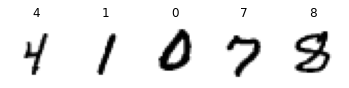

In [34]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break
    

In [35]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].repeat().prefetch(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: module 'keras.optimizers' has no attribute 'SGD'

In [3]:
class LayerNormalization(keras.layers.Layer):
    def __init__(eps=0.001,**kwargs):
        self.eps=eps
        super().__init__(**kwargs)
    def build(self,batch_input_shape):
        self.alpha=self.add_weight(
            name='alpha',shape=batch_input_shape[-1:],
            initializer='ones')
        self.beta=self.add_weight(
            name='beta',shape=batch_input_shape[-1:],
            initializer='zeros')
    def call(self,X):
        mean,variance=tf.nn.moments(X,axes=-1,keepdims=True)
        return self.alpha*(X-mean)/(tf.sqrt(variance+self.eps))+self.beta
    def compute_output_shape(self,batch_input_shape):
        return batch_input_shape
    def get_config(self):
        base_config=super().get_config()
        return {**base_config,"eps":self.eps}

<IPython.core.display.Javascript object>

In [4]:
X=X_train.astype(np.float32)
custom_layer_norm=LayerNomalization()
keras_layer_norm=keras.layers.LayerNormalization()

NameError: name 'X_train' is not defined

In [5]:
tf.reduce_mean(keras.losses.mean_absolute_error(
  keras_layer_norm(X),custom_layer_norm(X)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'keras_layer_norm' is not defined

In [6]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

<IPython.core.display.Javascript object>

NameError: name 'X' is not defined